In [1]:
from pprint import PrettyPrinter
import pandas as pd
from econ_utils import bea_api, create_df
import matplotlib.pyplot as plt
import squarify
import locale
from locale import atof

pd.set_option("display.max_rows", None)
pp = PrettyPrinter(indent=2)

## Personal Income

In [8]:
_, results, _ = bea_api(
  method="getDatasetList",
) 
dataset_list_df = create_df(results["Dataset"])

In [9]:
dataset_list_df

,DatasetName,DatasetDescription
0,NIPA,Standard NIPA tables
1,NIUnderlyingDetail,Standard NI underlying detail tables
2,MNE,Multinational Enterprises
3,FixedAssets,Standard Fixed Assets tables
4,ITA,International Transactions Accounts
5,IIP,International Investment Position
6,InputOutput,Input-Output Data
7,IntlServTrade,International Services Trade
8,GDPbyIndustry,GDP by Industry
9,Regional,Regional data sets


In [10]:
_, results, _ = bea_api(
  method="getParameterList",
  datasetName="NIPA",
)
nipa_param_list = create_df(results["Parameter"])

In [11]:
nipa_param_list.style.set_properties(subset="ParameterDescription", width="400px")

,ParameterName,ParameterDataType,ParameterDescription,ParameterIsRequiredFlag,ParameterDefaultValue,MultipleAcceptedFlag,AllValue
0,Frequency,string,"A - Annual, Q-Quarterly, M-Monthly",1,,1,
1,ShowMillions,string,A flag indicating that million-dollar data should be returned.,0,N,0,
2,TableID,integer,The standard NIPA table identifier,0,nan,0,
3,TableName,string,The new NIPA table identifier,0,nan,0,
4,Year,integer,List of year(s) of data to retrieve (X for All),1,,1,X


In [12]:
_, results, _ = bea_api(
  method="getParameterValues",
  datasetName="NIPA",
  parameterName="TableID"
)
nipa_param_table_id_values = create_df(results["ParamValue"])

In [13]:
nipa_param_table_id_values.query("Description.str.contains('Wage')").style.set_properties(subset="Description", width="600px")

,TableName,Description
58,T20200A,Table 2.2A. Wages and Salaries by Industry (A) (Q)
59,T20200B,Table 2.2B. Wages and Salaries by Industry (A) (Q)
76,T20700A,"Table 2.7A. Wages and Salaries by Industry, Monthly (M)"
77,T20700B,"Table 2.7B. Wages and Salaries by Industry, Monthly (M)"
187,T60300A,Table 6.3A. Wages and Salaries by Industry (A)
188,T60300B,Table 6.3B. Wages and Salaries by Industry (A)
189,T60300C,Table 6.3C. Wages and Salaries by Industry (A)
190,T60300D,Table 6.3D. Wages and Salaries by Industry (A)
199,T60600A,Table 6.6A. Wages and Salaries Per Full-Time Equivalent Employee by Industry (A)
200,T60600B,Table 6.6B. Wages and Salaries Per Full-Time Equivalent Employee by Industry (A)


In [14]:
_, results, keys = bea_api(
  method="getData",
  datasetName="NIPA",
  frequency="A",
  tableName="T60300D",
  year="All"
)

In [15]:
df = create_df(results["Data"]).astype({"TimePeriod": "int"})
df["DataValue"] = df["DataValue"].apply(lambda n : int(n.replace(",", "")))
axes = {"x": "TimePeriod", "y": "DataValue"}

<AxesSubplot:xlabel='TimePeriod'>

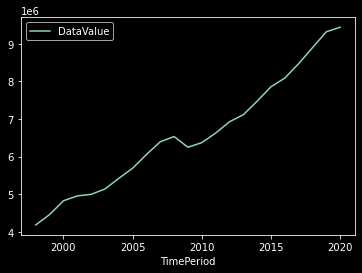

In [16]:
wages = df.loc[df["LineDescription"] == "Wages and salaries"][axes.values()]
wages.plot(**axes)

In [17]:
descriptions = df.LineDescription.unique()
descriptions[:10]

array(['Wages and salaries', 'Domestic industries', 'Private industries',
       'Agriculture, forestry, fishing, and hunting', 'Farms',
       'Forestry, fishing, and related activities', 'Mining',
       'Oil and gas extraction', 'Mining, except oil and gas',
       'Support activities for mining'], dtype=object)

<AxesSubplot:xlabel='TimePeriod'>

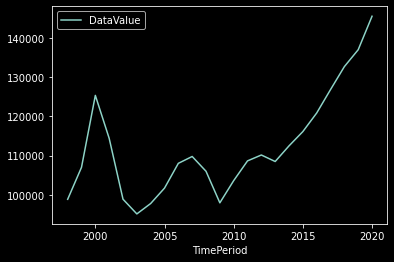

In [18]:
comp = df.loc[df.LineDescription == "Computer and electronic products"][axes.values()]
comp.plot(**axes)

<AxesSubplot:xlabel='TimePeriod'>

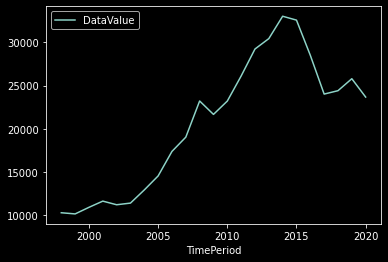

In [19]:
oil = df.loc[df.LineDescription == "Oil and gas extraction"][axes.values()]
oil.plot(**axes)

<AxesSubplot:xlabel='TimePeriod'>

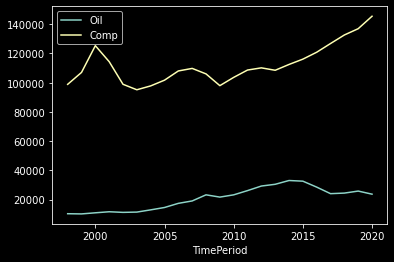

In [20]:
combined = oil\
  .merge(comp, how="left", on="TimePeriod")\
  .rename(columns={"DataValue_x": "Oil", "DataValue_y": "Comp"})
combined.plot(x="TimePeriod")

In [21]:
pivot_table = df.pivot_table(index="TimePeriod", columns="LineDescription", values="DataValue")
pivot_table

LineDescription,Accommodation,Accommodation and food services,Administrative and support services,Administrative and waste management services,"Agriculture, forestry, fishing, and hunting",Air transportation,Ambulatory health care services,"Amusements, gambling, and recreation industries",Apparel and leather and allied products,"Arts, entertainment, and recreation",...,Transit and ground passenger transportation,Transportation and warehousing,Truck transportation,Utilities,Wages and salaries,Warehousing and storage,Waste management and remediation services,Water transportation,Wholesale trade,Wood products
TimePeriod,,,,,,,,,,,,,,,,,,,,,
1998,36877.0,132524.0,143937.0,155397.0,24227.0,25926.0,166311.0,20855.0,14756.0,39587.0,...,7997.0,145689.0,44326.0,34837.0,4181616.0,14268.0,11460.0,2391.0,242234.0,16928.0
1999,39869.0,141716.0,157855.0,170121.0,24817.0,28084.0,171723.0,22537.0,13605.0,43394.0,...,8588.0,154664.0,46894.0,35856.0,4457926.0,15106.0,12267.0,2466.0,259617.0,17861.0
2000,43199.0,151785.0,176899.0,189367.0,25901.0,30584.0,183352.0,24850.0,13054.0,47998.0,...,8878.0,164605.0,49339.0,38377.0,4824946.0,16375.0,12468.0,2510.0,282522.0,18271.0
2001,43368.0,157181.0,180018.0,193055.0,26342.0,32912.0,195145.0,26170.0,11737.0,50672.0,...,8982.0,167572.0,49366.0,39764.0,4953635.0,16767.0,13037.0,2787.0,285192.0,17436.0
2002,43050.0,161903.0,182469.0,196041.0,26506.0,31141.0,208217.0,26989.0,10467.0,52589.0,...,9191.0,165221.0,48803.0,39882.0,4995843.0,17572.0,13572.0,2923.0,282489.0,17397.0
2003,43392.0,168359.0,186488.0,200590.0,26442.0,29013.0,219415.0,27920.0,9771.0,54855.0,...,9383.0,166842.0,49604.0,39390.0,5138269.0,18701.0,14101.0,3004.0,289905.0,17387.0
2004,46470.0,179163.0,202434.0,217493.0,28117.0,28909.0,235379.0,29131.0,9614.0,57213.0,...,10065.0,176699.0,53085.0,41010.0,5421014.0,20667.0,15059.0,3289.0,307412.0,18730.0
2005,48635.0,188306.0,216993.0,232975.0,28715.0,27140.0,249650.0,30095.0,9143.0,58798.0,...,10426.0,183725.0,56465.0,41906.0,5691379.0,22348.0,15982.0,3622.0,324776.0,19755.0
2006,51139.0,200901.0,231538.0,248462.0,30911.0,27276.0,266460.0,31025.0,8924.0,62865.0,...,11188.0,193950.0,59910.0,43599.0,6056739.0,23963.0,16925.0,3942.0,349162.0,19944.0


<AxesSubplot:xlabel='TimePeriod'>

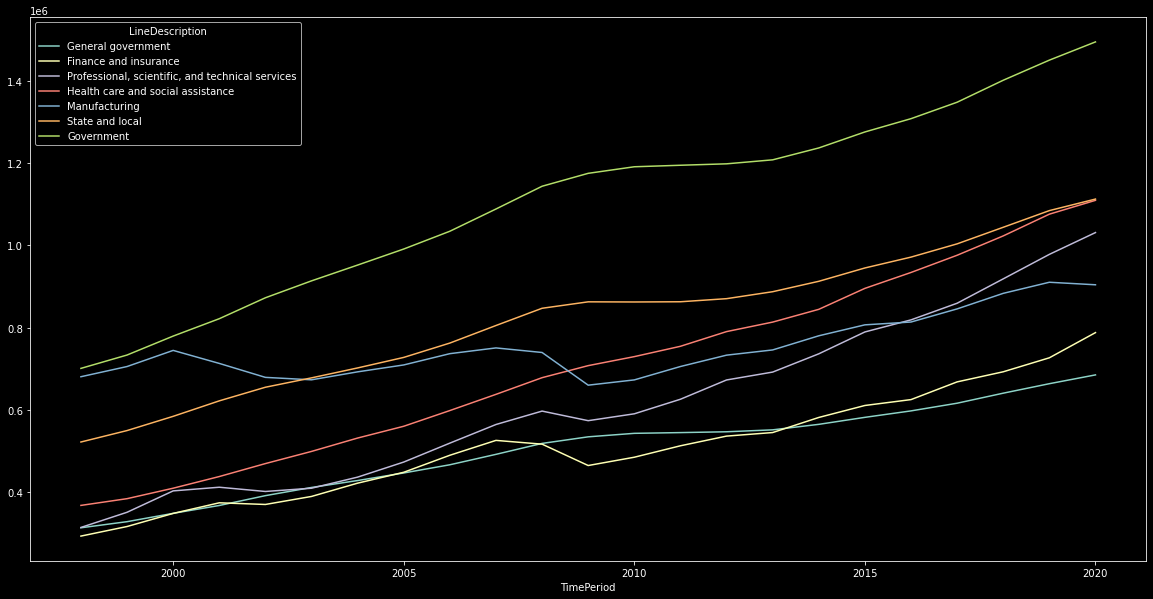

In [23]:
mean_keys = pivot_table.mean().nlargest(10).nsmallest(7).keys()
fig = pivot_table[mean_keys].plot(figsize=(20,  10))
fig

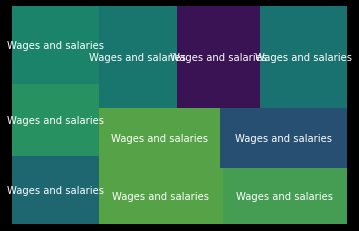

In [24]:
head = df.head(10)
squarify.plot(
  sizes=head['DataValue'], 
  label=head['LineDescription'], 
  alpha=.8
)
plt.axis('off')
plt.show()